# DIABETES ANALYSIS

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
import warnings
warnings.filterwarnings('ignore')

In [291]:
#Loading the dataset using pandas
data = pd.read_csv("diabetes-dataset.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [292]:
# Copy the data into df
df = data.copy(deep = True)

# DATA CLEANING

# HANDLING NULL VALUES AND REMOVING OUTLIERS USING IQR METHOD AND BOX PLOT

In [293]:
# Displaying the number of zero in data
print(df.isin([0]).sum())

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64


In [294]:
# Replacing zero(0) to NaN 
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [295]:
# Displaying the count of Nans
print(df.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [296]:
# Filling all NaN to mean values
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)

df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)

df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)

df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)

df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [297]:
# Displaying the count of Nans
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [298]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0


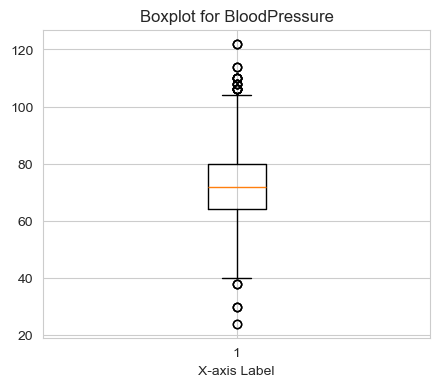

In [299]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 4))

# Create the boxplot
ax.boxplot(df['BloodPressure'])

# Set labels and title
ax.set_xlabel('X-axis Label')
ax.set_title('Boxplot for BloodPressure')

# Show the plot
plt.show()

Upper limit: 104.0
Lower limit: 40.0


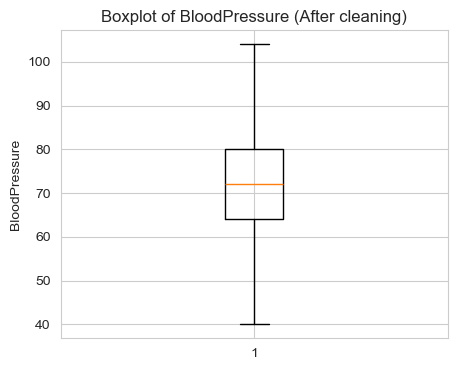

In [300]:
# Finding the IQR
percentile25 = df['BloodPressure'].quantile(0.25)
percentile75 = df['BloodPressure'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

# Filtering outliers
new_df = df[(df["BloodPressure"] >= lower_limit) & (df["BloodPressure"] <= upper_limit)]

# Boxplot representation
plt.figure(figsize=(5,4))
plt.boxplot(new_df['BloodPressure'])
plt.title('Boxplot of BloodPressure (After cleaning)')
plt.ylabel('BloodPressure')
plt.show()


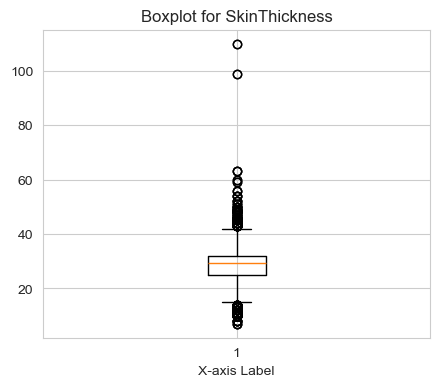

In [301]:
#Boxplot for skinthickness

# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 4))

# Create the boxplot
ax.boxplot(df['SkinThickness'])

# Set labels and title
ax.set_xlabel('X-axis Label')
ax.set_title('Boxplot for SkinThickness')

# Show the plot
plt.show()

Upper limit: 42.5
Lower limit: 14.5


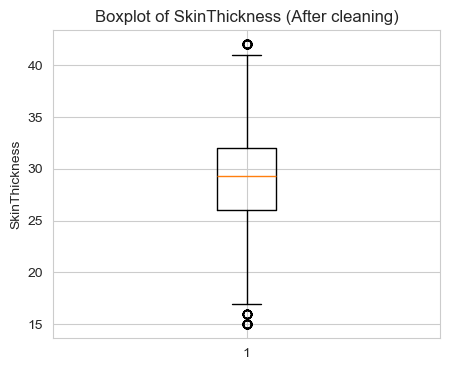

In [302]:
# Finding the IQR
percentile25 = df['SkinThickness'].quantile(0.25)
percentile75 = df['SkinThickness'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

# Filtering outliers
new_df = df[(df["SkinThickness"] >= lower_limit) & (df["SkinThickness"] <= upper_limit)]

# Boxplot representation
plt.figure(figsize=(5,4))
plt.boxplot(new_df['SkinThickness'])
plt.title('Boxplot of SkinThickness (After cleaning)')
plt.ylabel('SkinThickness')
plt.show()


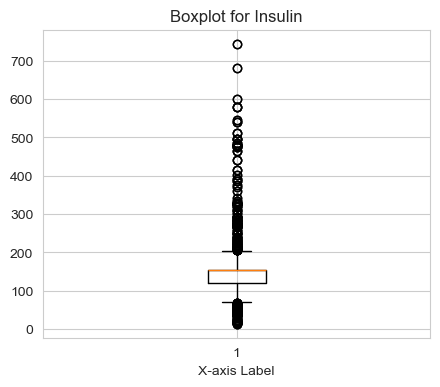

In [303]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 4))

# Create the boxplot
ax.boxplot(df['Insulin'])

# Set labels and title
ax.set_xlabel('X-axis Label')
ax.set_title('Boxplot for Insulin')

# Show the plot
plt.show()

Upper limit: 204.35823754789268
Lower limit: 69.38505747126439


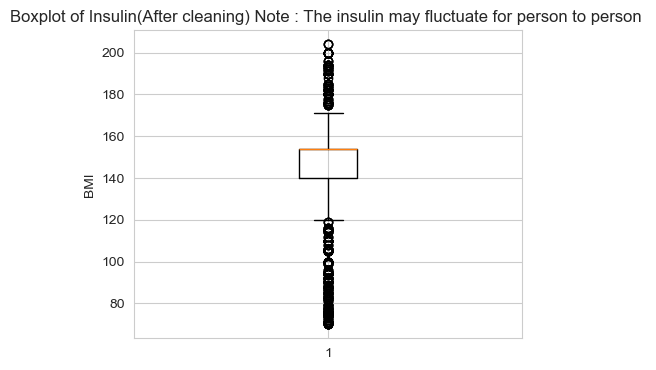

In [304]:

# Finding the IQR
percentile25 = df['Insulin'].quantile(0.25)
percentile75 = df['Insulin'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

# Filtering outliers
new_df = df[(df["Insulin"] >= lower_limit) & (df["Insulin"] <= upper_limit)]

# Boxplot representation
plt.figure(figsize=(5,4))
plt.boxplot(new_df['Insulin'])
plt.title('Boxplot of Insulin(After cleaning) Note : The insulin may fluctuate for person to person ')
plt.ylabel('BMI')
plt.show()


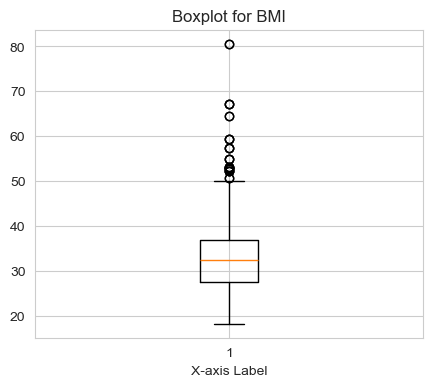

In [305]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 4))

# Create the boxplot
ax.boxplot(df['BMI'])

# Set labels and title
ax.set_xlabel('X-axis Label')
ax.set_title('Boxplot for BMI')

# Show the plot
plt.show()

Upper limit: 50.599999999999994
Lower limit: 13.800000000000008


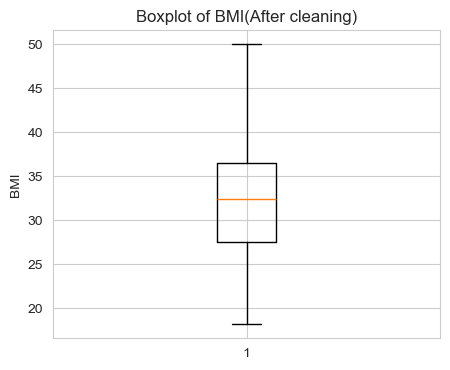

In [306]:
# Finding the IQR
percentile25 = df['BMI'].quantile(0.25)
percentile75 = df['BMI'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

# Filtering outliers
new_df = df[(df["BMI"] >= lower_limit) & (df["BMI"] <= upper_limit)]

# Boxplot representation
plt.figure(figsize=(5,4))
plt.boxplot(new_df['BMI'])
plt.title('Boxplot of BMI(After cleaning)')
plt.ylabel('BMI')
plt.show()


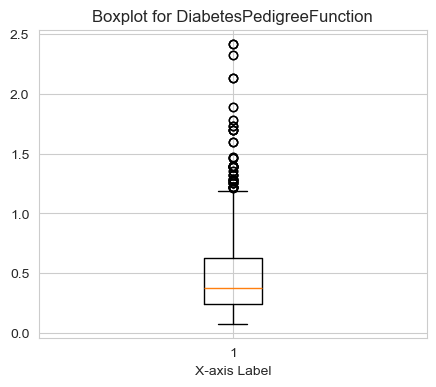

In [307]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(5, 4))

# Create the boxplot
ax.boxplot(df['DiabetesPedigreeFunction'])

# Set labels and title
ax.set_xlabel('X-axis Label')
ax.set_title('Boxplot for DiabetesPedigreeFunction')

# Show the plot
plt.show()

Upper limit: 1.194
Lower limit: -0.32600000000000007


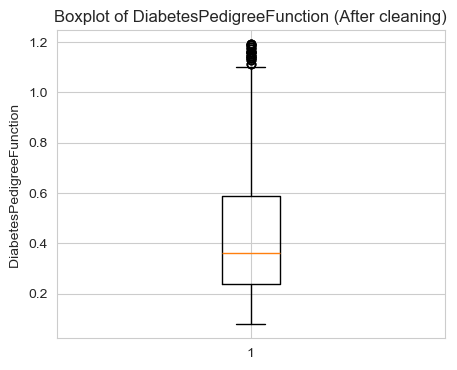

In [308]:
# Finding the IQR
percentile25 = df['DiabetesPedigreeFunction'].quantile(0.25)
percentile75 = df['DiabetesPedigreeFunction'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

# Filtering outliers
new_df = df[(df["DiabetesPedigreeFunction"] >= lower_limit) & (df["DiabetesPedigreeFunction"] <= upper_limit)]

# Boxplot representation
plt.figure(figsize=(5,4))
plt.boxplot(new_df['DiabetesPedigreeFunction'])
plt.title('Boxplot of DiabetesPedigreeFunction (After cleaning)')
plt.ylabel('DiabetesPedigreeFunction ')
plt.show()


Checking the shape of dataset now we have 1932 rows after cleaning

In [309]:
new_df.shape

(1932, 9)

converting the new data frame into new csv file

In [310]:
# Assuming 'df' is your DataFrame and 'filename' is the desired filename for the CSV file
filename = "diabetes-dataset1.csv"

# Write DataFrame to CSV file
df.to_csv(filename, index=False)

In [311]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.000000,55.000000,29.7,0.370,33,0
1996,8,179.0,72.000000,42.000000,130.000000,32.7,0.719,36,1
1997,6,85.0,78.000000,29.341275,153.743295,31.2,0.382,42,0
1998,0,129.0,110.000000,46.000000,130.000000,67.1,0.319,26,1


# Data Visualization

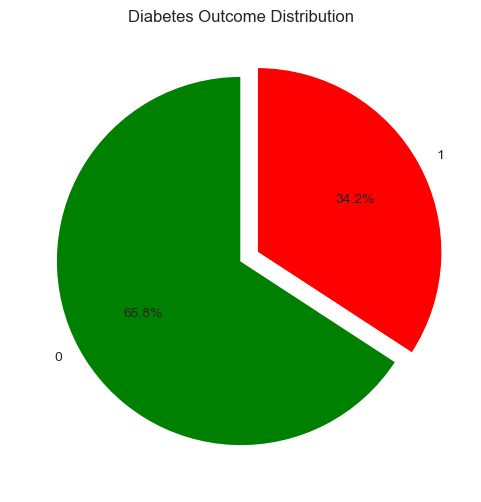

Inference: A larger proportion of individuals are non-diabetic, with fewer diabetic cases.


In [312]:
# 1. Pie Chart for Diabetes Outcome Distribution
plt.figure(figsize=(6, 6))
df["Outcome"].value_counts().plot.pie(autopct="%1.1f%%", colors=["green", "red"], startangle=90, explode=[0, 0.1])
plt.title("Diabetes Outcome Distribution")
plt.ylabel("")  # Hide y-label for better visualization
plt.show()
print("Inference: A larger proportion of individuals are non-diabetic, with fewer diabetic cases.")


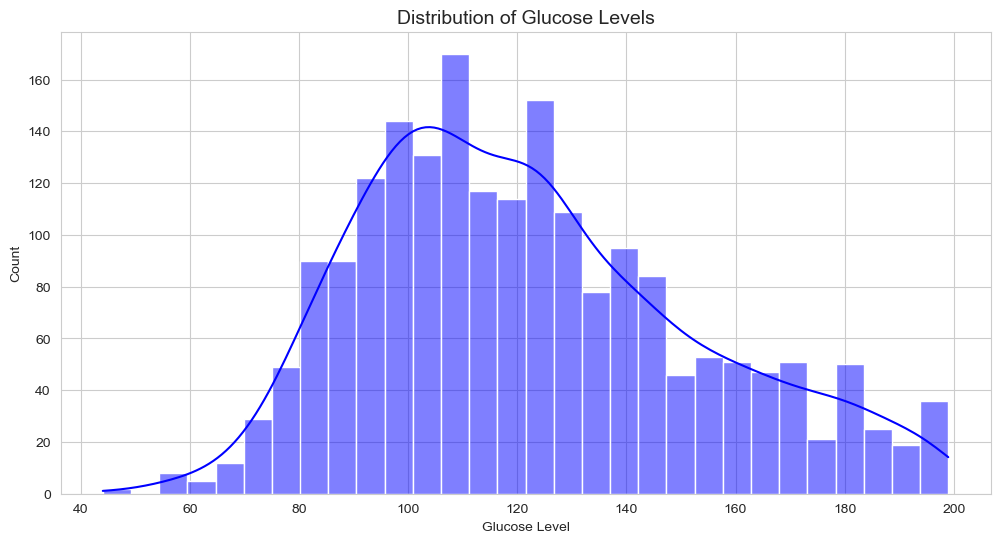

Inference: Most glucose levels range between 80 and 180, with a peak around 100-120.


In [313]:
# Set Seaborn style
sns.set_style("whitegrid")

# 1. Distribution of Glucose Levels
plt.figure(figsize=(12, 6))
sns.histplot(df["Glucose"], bins=30, kde=True, color="blue")
plt.title("Distribution of Glucose Levels", fontsize=14)
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()
print("Inference: Most glucose levels range between 80 and 180, with a peak around 100-120.")


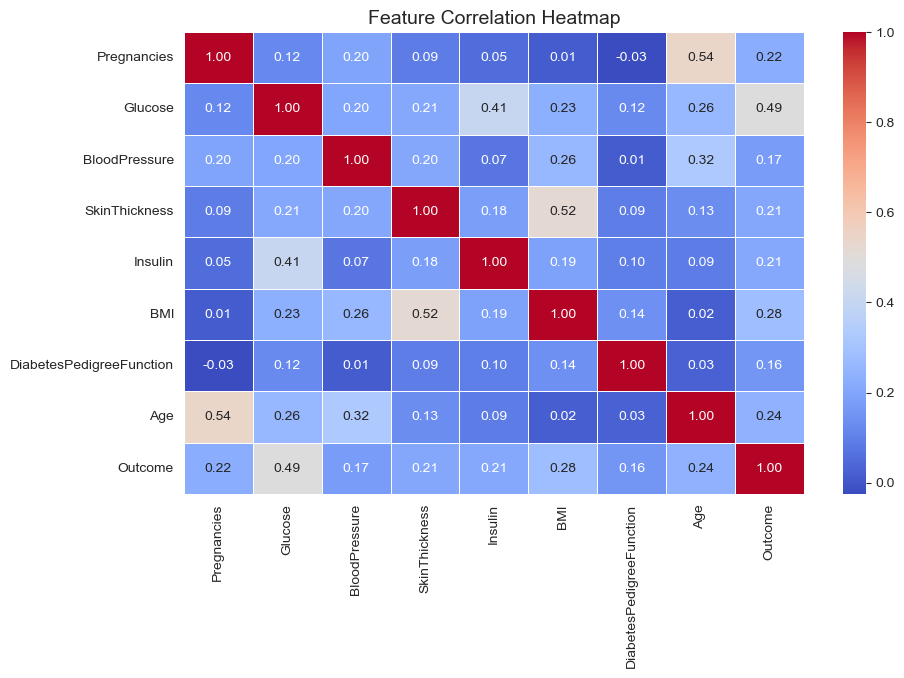

Inference: Glucose has the highest correlation with diabetes outcome.


In [314]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.show()
print("Inference: Glucose has the highest correlation with diabetes outcome.")


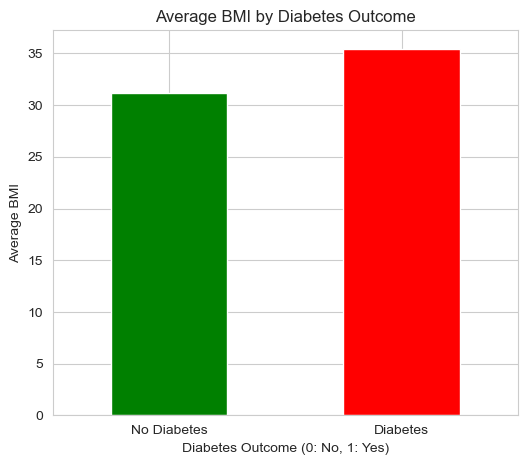

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average BMI for each outcome (0 = No Diabetes, 1 = Diabetes)
bmi_outcome = df.groupby("Outcome")["BMI"].mean()

# Bar Chart
plt.figure(figsize=(6, 5))
bmi_outcome.plot(kind="bar", color=["green", "red"])
plt.title("Average BMI by Diabetes Outcome")
plt.xlabel("Diabetes Outcome (0: No, 1: Yes)")
plt.ylabel("Average BMI")
plt.xticks([0, 1], ["No Diabetes", "Diabetes"], rotation=0)
plt.show()

# Inference:
# - Diabetic individuals have **higher average BMI** than non-diabetic individuals.
# - This suggests that **higher BMI (obesity) may be a risk factor for diabetes**.


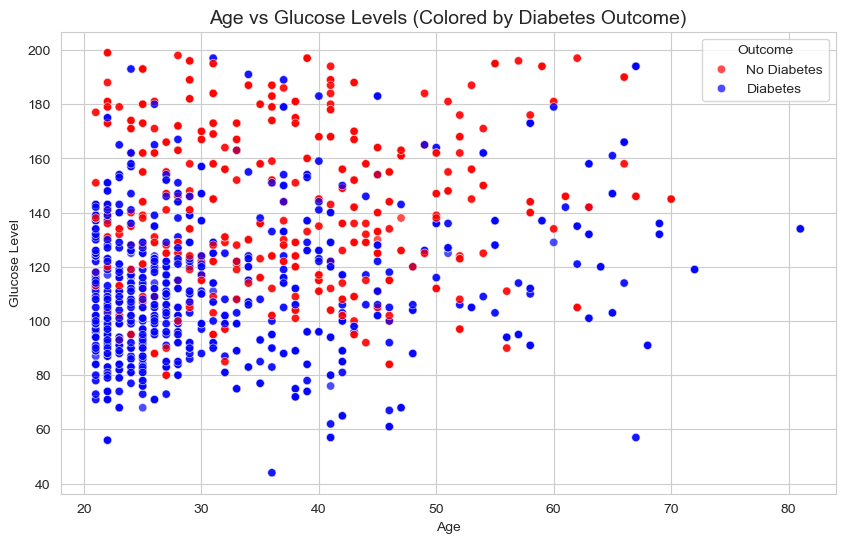

In [316]:
# 4. Scatter Plot of Age vs Glucose
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Age"], y=df["Glucose"], hue=df["Outcome"], palette=["blue", "red"], alpha=0.7)
plt.title("Age vs Glucose Levels (Colored by Diabetes Outcome)", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Glucose Level")
plt.legend(title="Outcome", labels=["No Diabetes", "Diabetes"])
plt.show()
# Inference: Higher glucose levels are more common in older individuals with diabetes.

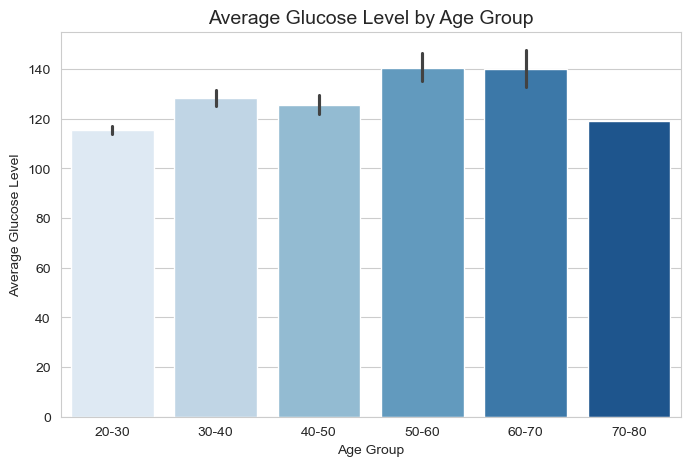

In [317]:
#Bar Chart for Average Glucose Levels Across Age Groups
df["AgeGroup"] = pd.cut(df["Age"], bins=[20, 30, 40, 50, 60, 70, 80], labels=["20-30", "30-40", "40-50", "50-60", "60-70", "70-80"])

plt.figure(figsize=(8, 5))
sns.barplot(x=df["AgeGroup"], y=df["Glucose"], palette="Blues")
plt.title("Average Glucose Level by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Average Glucose Level")
plt.show()
# Inference: Older age groups tend to have higher average glucose levels, increasing diabetes risk.

# Machine Learning

In [318]:
# Split independent(x) and dependent(y) data
x=df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]
y=df["Outcome"]

In [319]:
x.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,138.0,62.000000,35.000000,153.743295,33.6
1,84.0,82.000000,31.000000,125.000000,38.2
2,145.0,72.403665,29.341275,153.743295,44.2
3,135.0,68.000000,42.000000,250.000000,42.3
4,139.0,62.000000,41.000000,480.000000,40.7


In [320]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

In [321]:
# Training Model using train_test_split
from sklearn.model_selection import train_test_split

In [322]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=48)

In [323]:
x_train

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
447,95.0,80.000000,45.000000,92.000000,36.5
1254,179.0,70.000000,29.341275,153.743295,35.1
1492,139.0,75.000000,29.341275,153.743295,25.6
1399,91.0,70.000000,32.000000,88.000000,33.1
70,100.0,66.000000,20.000000,90.000000,32.9
...,...,...,...,...,...
347,116.0,72.403665,29.341275,153.743295,23.5
1476,144.0,82.000000,32.000000,153.743295,38.5
1361,99.0,70.000000,16.000000,44.000000,20.4
563,99.0,60.000000,19.000000,54.000000,26.9


In [324]:
y_train

447     0
1254    0
1492    0
1399    0
70      1
       ..
347     0
1476    1
1361    0
563     0
1536    0
Name: Outcome, Length: 1400, dtype: int64

In [325]:
#imporing all algorithm 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [326]:
# Training the data
LR = LogisticRegression(random_state=1)
LR.fit(x_train, y_train)

LogisticRegression(random_state=1)

In [327]:
# Predicting
y_pred_LR = LR.predict(x_test)
print("Test set Accuracy: ",accuracy_score(y_test, y_pred_LR))

Test set Accuracy:  0.7666666666666667


In [328]:
# Training the data
DTC=DecisionTreeClassifier(criterion="entropy", random_state=1, max_depth=2)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

In [329]:
# Predicting
y_pred_DTC = DTC.predict(x_test)
print("Test set Accuracy: ",accuracy_score(y_test, y_pred_DTC))

Test set Accuracy:  0.7483333333333333


In [330]:
# Training the data
KNC = KNeighborsClassifier(n_neighbors = 1)
KNC.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [331]:
# Predicting
y_pred_KNC=KNC.predict(x_test)
print("Test set Accuracy: ",accuracy_score(y_test, y_pred_KNC))

Test set Accuracy:  0.9516666666666667


In [332]:
# Training the data
RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 1, max_depth = 10)
RF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=1)

In [333]:
# Predicting
y_pred_RF = RF.predict(x_test)
print("Test set Accuracy: ",accuracy_score(y_test, y_pred_RF))

Test set Accuracy:  0.915


In [334]:
print("Logistic Regression :",accuracy_score(y_test, y_pred_LR))
print("Random Forest Classifier :",accuracy_score(y_test, y_pred_RF))
print("Decision Tree Classifier :",accuracy_score(y_test, y_pred_DTC))
print("K-Nearest Neighbors Classifier:",accuracy_score(y_test, y_pred_KNC))

Logistic Regression : 0.7666666666666667
Random Forest Classifier : 0.915
Decision Tree Classifier : 0.7483333333333333
K-Nearest Neighbors Classifier: 0.9516666666666667


# BAR GRAPH SHOWING COMPARISON BETWEEN THE DIFFERENT ALGORITHMS

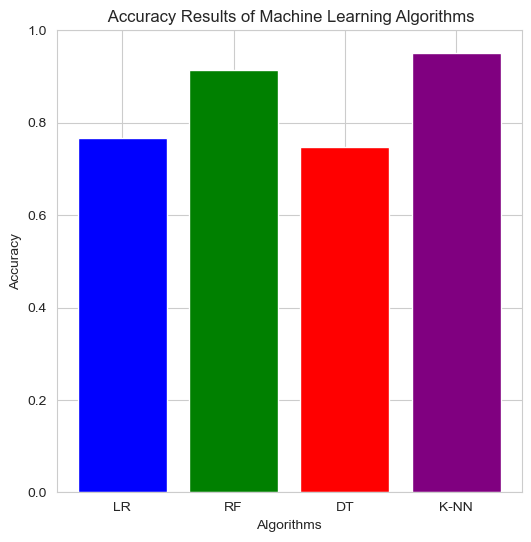

In [335]:
algorithms = ['LR', 'RF', 'DT', 'K-NN']

# Sample accuracies (replace with actual values)
accuracies = [accuracy_score(y_test, y_pred_LR),accuracy_score(y_test, y_pred_RF),accuracy_score(y_test, y_pred_DTC),accuracy_score(y_test, y_pred_KNC)]

# Plot the bar graph
plt.figure(figsize=(6, 6))  # Adjust figure size if needed
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'purple'])

# Add titles and labels
plt.title(' Accuracy Results of Machine Learning Algorithms')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

# Show the plot
plt.ylim(0, 1)  # Setting y-axis limits to ensure visibility of differences
plt.show()

In [336]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv("Cleaned_Data.csv", index=False)

print("Cleaned data has been saved successfully as 'Cleaned_Student_Data.csv'")

Cleaned data has been saved successfully as 'Cleaned_Student_Data.csv'
